Colab Link: hhttps://colab.research.google.com/drive/1TfCOpokUFywtWltW615sqZkbbZ_aIDW6




**Summary**

In this research we attempt to compare the difference of performance between a decision tree and a random forest model.

For this research we use the HAR dataset for benchmarking.

We use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants and define if the exercise has been properly done. The testing data rate the execution as below:

* exactly according to the specification (A)

* throwing elbows to the front (B)

* lifting the dumbbell only halfway (C)

* lowering the dumbbell only halfway (D)

* throwing the hips to the front (E)

We split the train data into 75%/25% to train our models on the first 75% and test our models on the last 25%.

The random forest performed much better as the accuracy was almost twice higher and the Kappa almost 3 times higher than the decision tree model.

**Set Environment**


In [1]:
#set R environment
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [2]:

install.packages('caret')
install.packages('randomForest')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('rattle')
install.packages('e1071')
set.seed(2017)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘XML’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(caret)
library(e1071)
library(randomForest)
library(rpart)
library(rpart.plot)
library(rattle)
set.seed(2017)

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Rattle: A free graphical interface for data science with R.
Version 5.3.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: ‘rattle’


The following object is masked from ‘package:randomForest’:

    importance




**Extract and transform**

In [0]:
#train data load
urltrain <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv"
filename <- "pml-training.csv"
tmp <- tempfile()
if(!file.exists(filename))download.file(urltrain, destfile = filename)
data_train <- read.csv(filename, na.strings=c("", "NA", "#DIV/0!"), row.names = 1)
#test data load
urltest <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv"
filename <- "pml-testing.csv"
tmp <- tempfile()
if(!file.exists(filename))download.file(urltest, destfile = filename)
data_test <- read.csv(filename, na.strings=c("", "NA", "#DIV/0!"), row.names = 1)
# remove NAs
data_train_clean <- data_train[,!sapply(data_train,function(x) any(is.na(x)))]
data_test_clean <- data_test[,!sapply(data_test,function(x) any(is.na(x)))]
# remove personal info which are not predicators
data_train_clean <-data_train_clean[,-c(1:6)]
data_test_clean <-data_test_clean[,-c(1:6)]
# partitionning
inTrain <- createDataPartition(y=data_train_clean$classe, p=0.75, list=FALSE)
Training <- data_train_clean[inTrain, ] 
Testing <- data_train_clean[-inTrain, ]

**Decision Tree example**


The decision tree does not provide great results as the accuracy is .4935 and the Kappa is .3376.


In [5]:
dt <- train(classe ~ .,method="rpart",data=Training)
print(dt$finalModel)

n= 14718 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 14718 10533 A (0.28 0.19 0.17 0.16 0.18)  
   2) roll_belt< 130.5 13489  9315 A (0.31 0.21 0.19 0.18 0.11)  
     4) pitch_forearm< -33.95 1190     9 A (0.99 0.0076 0 0 0) *
     5) pitch_forearm>=-33.95 12299  9306 A (0.24 0.23 0.21 0.2 0.12)  
      10) magnet_dumbbell_y< 426.5 10226  7321 A (0.28 0.18 0.24 0.19 0.1)  
        20) roll_forearm< 124.5 6414  3789 A (0.41 0.18 0.19 0.17 0.058) *
        21) roll_forearm>=124.5 3812  2535 C (0.073 0.18 0.33 0.23 0.18) *
      11) magnet_dumbbell_y>=426.5 2073  1063 B (0.042 0.49 0.045 0.22 0.2) *
   3) roll_belt>=130.5 1229    11 E (0.009 0 0 0 0.99) *


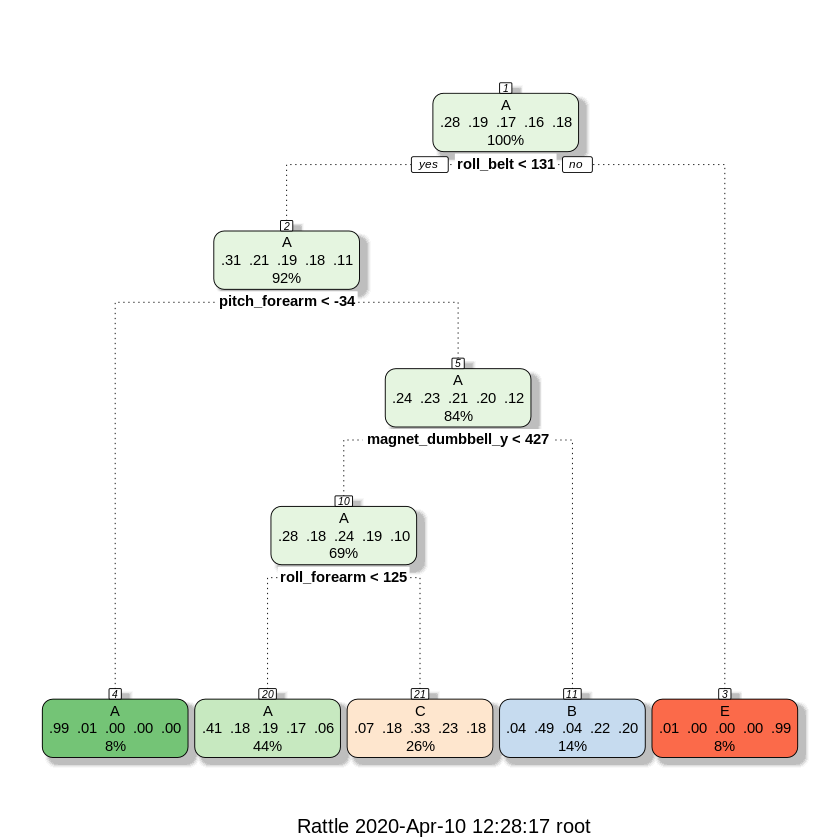

In [6]:
fancyRpartPlot(dt$finalModel)

In [7]:
prediction_dt <- predict(dt,newdata=Testing)
confusionMatrix(prediction_dt,Testing$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1245  385  378  361  128
         B   35  338   36  154  110
         C  112  226  441  289  250
         D    0    0    0    0    0
         E    3    0    0    0  413

Overall Statistics
                                         
               Accuracy : 0.4969         
                 95% CI : (0.4829, 0.511)
    No Information Rate : 0.2845         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3434         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.8925  0.35616  0.51579   0.0000  0.45838
Specificity            0.6432  0.91530  0.78340   1.0000  0.99925
Pos Pred Value         0.4986  0.50223  0.33460      NaN  0.99279
Neg Pred Value         0.9377  0.85559  0.8845

**The Random Forest**

As we can see the random forest provides much better prediction as the accuracy is .9898 and the Kappa is .9871 while for the decision tree, we had an accuracy of .4935 and a Kappa of .3376


In [8]:
rf <- train(classe ~ .,method="rf",data=Training)
#load(file = "rf.rda")
print(rf$finalModel)


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 0.69%
Confusion matrix:
     A    B    C    D    E  class.error
A 4183    1    0    0    1 0.0004778973
B   12 2829    7    0    0 0.0066713483
C    0   21 2543    3    0 0.0093494351
D    0    0   47 2363    2 0.0203150912
E    0    0    0    8 2698 0.0029563932


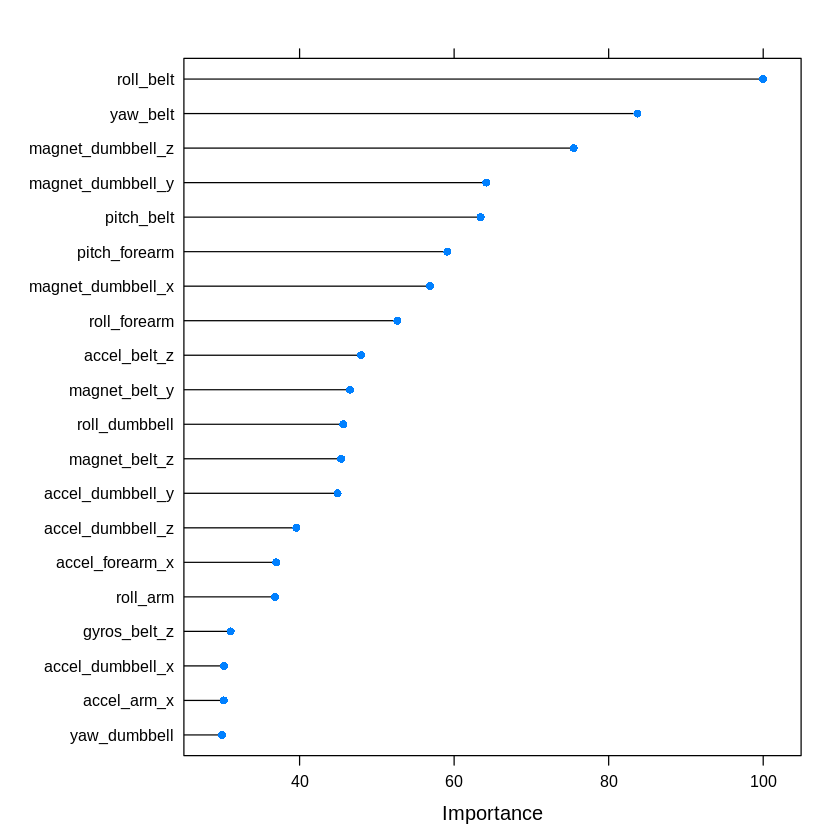

In [9]:
varimp <- varImp(rf, varImp.train=FALSE)
plot(varimp, top=20)

In [10]:
prediction_rf <- predict(rf,newdata=Testing)
confusionMatrix(prediction_rf,Testing$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1395    9    0    0    0
         B    0  936    3    0    0
         C    0    4  851   10    0
         D    0    0    1  794    1
         E    0    0    0    0  900

Overall Statistics
                                          
               Accuracy : 0.9943          
                 95% CI : (0.9918, 0.9962)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9928          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   0.9863   0.9953   0.9876   0.9989
Specificity            0.9974   0.9992   0.9965   0.9995   1.0000
Pos Pred Value         0.9936   0.9968   0.9838   0.9975   1.0000
Neg Pred Value         1.0000   0.996